### Code-NN
 - It is way similar to tensorflow model but not as tensorflow, tensorflow is more advance than 
    this, but I am improving this a lot that It should compete tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.datasets import make_blobs,make_circles,make_classification

Using TensorFlow backend.
F:\Anaconda_Files\Anaconda\envs\tensorflow-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])
y = np.array([0,1,1,0])
y = y.reshape(-1,1)

In [3]:
X.shape,y.shape

((4, 2), (4, 1))

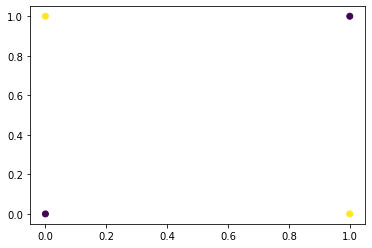

In [4]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [5]:
def ReLu(Z):
    return np.maximum(0,Z)

In [6]:
def softmax(y):
    """
    softmax = e^y(i)/sum(e^y(i))
    """
    
    ea = np.exp(y)
    
    total = ea/np.sum(ea,axis = 1,keepdims=True)
        
    return total

In [40]:
class MLP:
    
    def __init__(self,hidden_layers,output_layer,input_layer,activation = "relu",output_layer_activation = "softmax"):
        # Dictionary of all layers with its weight and bias
        model_layers = {}
        # make self varible for activation
        self.activation = activation
        # Total no of layers include input + hidden + output layers 
        total_layers = 1 + len(hidden_layers) + 1
        # layers list [input_layer,hidden_layer,output_layer]
        # layers[0]--->input_layer
        #layers[total_layer-1]--->output_layer
        layers = []
        layers.append(input_layer)
        for i in hidden_layers:
            layers.append(i)
        layers.append(output_layer)
        layers = np.array(layers)
        for layer_no in range(total_layers-1):
            model_layers[layer_no] = [np.random.randn(layers[layer_no],layers[layer_no+1]),np.zeros((1,layers[layer_no+1]))]
        # make class variable self.model_layers to store model_layers
        self.model_layers = model_layers
        
    # function to do forward pass
    def forward_propagation(self,X):
        '''
        This function forward_propagation will make model variable that is having 
        self.model_layers which includes weight and bias for particular layer,
        then it will 4 list i.e., activation units,weight matrix,bias matrix and 
        Z matrix, and it will return last activation unit.
        
        
        Take an input X(array) and do forward pass operation and return last activation
        function.
        
        example ->
        Input: X(array)
        Operation: hidden_layers = [4,3]
                   input_layer = 2
                   output_layer = 2
                   
                   total_layers = 4
                   layers = [2,4,3,2]
                   
                   Z[0] = X*W[0] + b[0]
                   A[0] = activation_function(Z[0])
                   
                   Z[1] = A[1]*W[1] + b[1]
                   A[1] = activation_function(Z[1])
        
                   Z[2] = A[1]*W[2] + b[2]
                   A[2] = activation_function(Z[2])
                   
        Output: A[2]
        '''
        # make model variable of self.model_layers
        model  = self.model_layers
        # make 4 lists of weight metrics, bias metrics, activation metrics, Z metrics
        W = []
        b = []
        Z = []
        A = []
        # append values in Weight metrics and bias metrics
        for key in model.keys():
            W.append(model[key][0])
            b.append(model[key][1])
        W = np.array(W)
        # append values in activation units metrics and Z mertics 
        for i in range(W.shape[0]):
            if i == 0:
                Z.append(np.dot(X,W[0]) + b[0])
                A.append(np.tanh(Z[0]))
                
            else :
                if i == W.shape[0] - 1:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(softmax(Z[i]))
                else:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(np.tanh(Z[i]))
                    
        # make class variables of all four lists
        self.activation_units = (A)
        self.W = (W)
        self.b = (b)
        self.Z = (Z)
        
        return A[-1]
    
    # function to do backpropagation in Multi Layer Perceptron
    def backward_propagation(self,X,y,learning_rate = 0.001):
        '''
        This function backward_propagation is initally taking self.model_layers,
        self.W,self.b,self.activation_units these 4 will help to do backpropagation 
        in Multi Layer Perceptron.
        
        As above 4 things will help in computing dZ,dW,db i.e., the derivatives of Z metrics,
        Weight metrics and bias metrics and later perform gradient descent algo. and
        update weight and biases
        
        It takes an input as X(input array) and its prediction array(y), and takes an
        input hyper-parameter learning_rate to perform gradient descent algo.
        
        Therefore, 
            Backpropagation is basiaclly perform gardient descent algo, and is to
            compute dZ,dW,db 
        example ->
        Input: X(input array)
        Operation: To Compute dZ,dW,db
                   we need W,b,Z,A
                   
                   dZ[2] = A[2] - y
                   dW[2] = (A[1].dZ[2])
                   db[2] = dZ[2]
                   
                   dZ[1] = derivative of activation_function * (dZ[2]*W[2])
                   dW[1] = (A[0].dZ[1])
                   db[1] = dZ[1]
                   
                   dZ[0] = derivative of activation_function * (dZ[1]*W[1])
                   dW[0] = (X.dZ[0])
                   db[0] = dZ[0]
                   
        Output: Perfrom Gradient Descent Algo
                W[i] -= learning_rate * dW[i]
                b[i] -= learning_rate * db[i]
        '''
        # make model variable of self.model_layers
        model  = self.model_layers
        W = self.W
        b = self.b
        A = self.activation_units
        dZ = []
        db = []
        dW = []
        # calculate dZ
        for i in reversed(range(W.shape[0])):
            if i == W.shape[0] - 1:
                dZ.append(A[i] - y)    
            else:
                if i == 0:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
                else:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
        # reverse dZ so that dZ will get be related to dW and db
        dZ = dZ[::-1]
        # calculate dW and db
        for i in range(W.shape[0]):
            if i == W.shape[0] - 1:
                dW.append(np.dot(A[i-1].T,dZ[i]))
                db.append(np.sum(dZ[i],axis = 0))    
            else:
                if i == 0:
                    dW.append(np.dot(X.T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
                else:
                    dW.append(np.dot(A[i-1].T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
            
            # perform gradient descent algo.
            W[i] -= learning_rate * dW[i]
            b[i] -= learning_rate * db[i]
        # class variable to store W and b, after updation
        self.W = W
        self.b = b
        
    # Predict function to perform prediction
    def predict(self,X):
        '''
        This function will takes an x_query as input and return the output as per
        given y(prediction)
        
        Return:
            1: Probabilities 
            2: index of max probability
        '''
        y_out = self.forward_propagation(X)
        
        return y_out,np.argmax(y_out,axis = 1)
    
    # Loss Function to calculate loss
    def loss(self,y_opt,p):
        '''
        It will calculate mean squared loss, i.e., categorical cross_entropy loss
        
        retuurn loss
        '''
        l = np.mean(y_opt*np.log(p))
        return -l
    
    # Training Function
    def train(self,X,y,batch_size,epochs,metrics):
        '''
        This Train function is basically doing training and perform particular metrics like 
        "accurcay","r2Score", depend on what we calculate, 
        and it will predict loss after every loss,
        it contains a list of training loss, that contains all the losses(the loss calculated after
        every iteration,
        example->
         X.shape[0] = 500
         BATCH_SIZE = 32
         NO_OF_ITERATIONS = int(X.shape[0]/BATCH_SIZE)-1
         training_loss.shape = (len(NO_OF_ITERATIONS))
         ).
         
        Prediction score will be calcuated after each epoch, and it is also having a numpy.ndarray
        that store all the prediction score, for each iteration, and shape is same as training_loss
        $ y should be one hot vector
        $ training_loss is numpy.ndarray
        $ epochs is hyper parameter
        $ metrics is hyper parameter
        '''
        training_loss = []
        train_loss_dic = {}
        metrics_ = []
        metrics_dic = {}
        y_opt = to_categorical(y)
        
        for i in range(epochs):
            print("EPOCH-->{}".format(i+1))
            for j in range(int(X.shape[0]/batch_size) - 1):
                Y_ = self.forward_propagation(X[j*batch_size:(j+1)*batch_size])
                l = self.loss(y_opt[j*batch_size:(j+1)*batch_size],Y_)
                if metrics == "accuracy" or metrics == "Accuracy" or metrics == "ACCURACY":
                    met = (sum(Y_ == y)/y.shape[0])*100
                else:
                    met = None
                self.backward_propagation(X[j*batch_size:(j+1)*batch_size],y_opt[j*batch_size:(j+1)*batch_size])
                training_loss.append(l)
                metrics_.append(met)
                train_loss_dic[i] = l
                metrics_dic[i] = l
                if train_loss_dic[i] == None:
                    train_loss_dic[i] = l
                else:
                    train_loss_dic[i] = l
            print(" Training Loss----->  ",l)
            
        
        return train_loss_dic,metrics_dic
    
    

In [46]:
model = MLP(hidden_layers=[4,3],output_layer=2,input_layer=2)

In [47]:
model.train(X,y,2,10,metrics="accuracy")

EPOCH-->1


F:\Anaconda_Files\Anaconda\envs\tensorflow-env\lib\site-packages\ipykernel_launcher.py:225: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


TypeError: 'bool' object is not iterable

In [30]:
model.predict(X[0])

[array([[-0.00121461,  0.00100665,  0.00622787, -0.00574468]]), array([[-0.0093351 ,  0.01538209,  0.01652933]]), array([[0.49851027, 0.50148973]])]
[[0.49851027 0.50148973]]


array([1], dtype=int64)

In [31]:
y[0]

array([0])

In [15]:
y_out = []
for i in range(X.shape[0]):
    y_out.append(model.predict(X[i]))

[array([[-0.01342753,  0.0267609 ,  0.0006956 , -0.00989456]]), array([[-0.03282873,  0.04428288,  0.09311656]]), array([[0.50770326, 0.49229674]])]
[[0.50770326 0.49229674]]
[array([[-0.09595524, -0.33180878, -0.09967312,  0.50136105]]), array([[ 0.02665382,  0.17334572, -0.83627723]]), array([[0.35964772, 0.64035228]])]
[[0.35964772 0.64035228]]
[array([[-0.98534361,  0.57675421, -0.02132224,  0.01742284]]), array([[-0.96445039,  0.9722111 ,  0.97640928]]), array([[0.70663376, 0.29336624]])]
[[0.70663376 0.29336624]]
[array([[-0.98756706,  0.27841087, -0.12142416,  0.52153213]]), array([[-0.94667586,  0.97638624,  0.74967385]]), array([[0.67291706, 0.32708294]])]
[[0.67291706 0.32708294]]
[array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64)]


In [16]:
print(y_out)

[array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64)]


In [23]:
sum(y_out == y)/4*100

array([75.])

In [24]:
y

array([[0],
       [1],
       [1],
       [0]])

In [20]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense())